In [1]:
import os
import pandas as pd
import utils
from datetime import datetime

c:\Users\agand\OneDrive\Escritorio\lakes\lake-algae-analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
data_dir = os.path.join(parent_dir, 'data')

universities_path = os.path.join(data_dir, 'Universities.csv')
universities = pd.read_csv(universities_path, encoding='ISO-8859-1')
universities = universities[['name', 'longitude', 'latitude']]

first5universities = universities.head(5)

In [3]:
first5universities

,name,longitude,latitude
0,Abhilashi University,77.0354,31.5144
1,Academy Of Maritime Education And Training,80.2328,12.7642
2,Acharya Nagarjuna University,80.5468,16.4571
3,Acharya Ng Ranga Agricultural University,78.3935,17.3354
4,Adamas University,88.4379,22.7423


In [4]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import osmnx as ox
import os
import geopandas as gpd
from shapely.geometry import Point
from pyproj import CRS, Transformer
import json

from sentinelhub import (
    SHConfig,
    BBox,
    DataCollection,
    Geometry,
    DownloadRequest,
    MimeType,
    MosaickingOrder,
    SentinelHubDownloadClient,
    SentinelHubRequest,
    bbox_to_dimensions,
)

In [23]:
import importlib

importlib.reload(utils)

<module 'utils' from 'c:\\Users\\agand\\OneDrive\\Escritorio\\lakes\\lake-algae-analysis\\notebooks\\utils.py'>

Finding lakes of university number 0
Finding lakes of university number 1
Finding lakes of university number 2
Finding lakes of university number 3
Finding lakes of university number 4


c:\Users\agand\OneDrive\Escritorio\lakes\lake-algae-analysis\notebooks\utils.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt.title("Lakes and Universities from India")


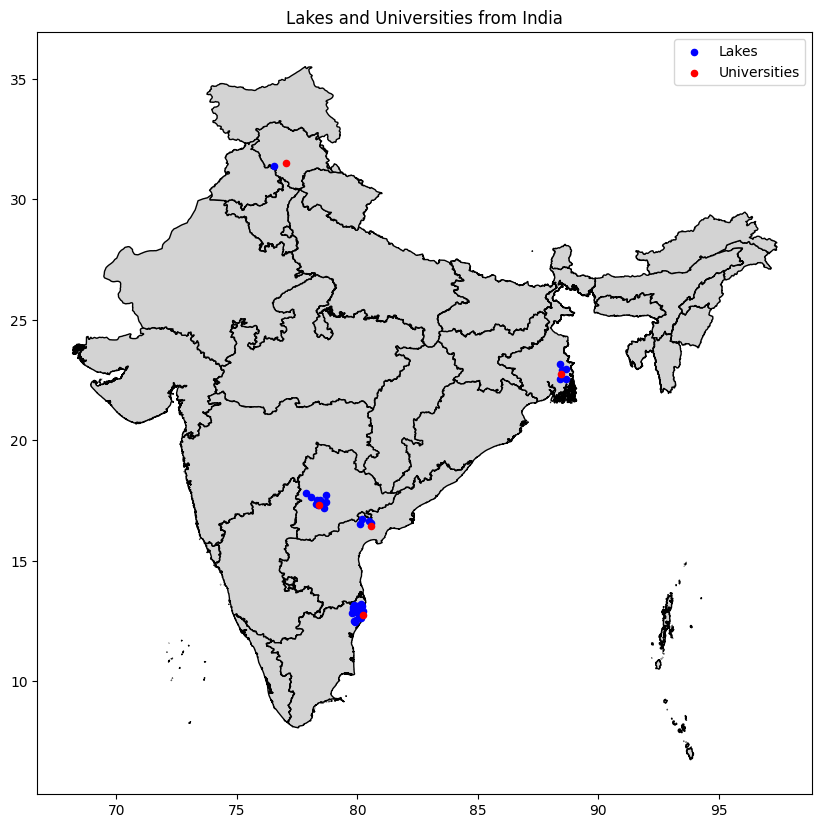

In [86]:
first5lakes = utils.get_all_lakes(first5universities, 50000)

In [82]:
first_centroid = first5lakes.head(1)["centroid_ws"][0]
first_centroid.x

76.54295053297236

In [83]:
first = first5lakes.head(2)
first['centroid_long'] = first['centroid_ws'].apply(lambda lake: lake.x)

c:\Users\agand\OneDrive\Escritorio\lakes\lake-algae-analysis\.venv\Lib\site-packages\geopandas\geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [84]:
first

,osmid,name,area,distance,centroid_ws,university,centroid_long
0,1601368,Gobind Sagar,1.288780e+08,48946.638589,POINT (76.54295 31.38530),Abhilashi University,76.542951
1,1929498,NaN,8.202942e+06,50954.394518,POINT (78.05877 17.66482),Acharya Ng Ranga Agricultural University,78.058769


In [5]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import osmnx as ox
import os
import geopandas as gpd
from shapely.geometry import Point
from pyproj import CRS, Transformer
import json

from sentinelhub import (
    SHConfig,
    CRS as sentinelCRS,
    BBox,
    DataCollection,
    Geometry,
    DownloadRequest,
    MimeType,
    MosaickingOrder,
    SentinelHubDownloadClient,
    SentinelHubRequest,
    bbox_to_dimensions,
)

In [6]:
lakes = pd.read_csv("../data/all_lakes.csv")

In [20]:
first10 = lakes.head(10)

In [21]:
first10

,osmid,name,area,distance,university,centroid_long,centroid_loat
0,1601368,Gobind Sagar,1.288780e+08,48946.638589,Abhilashi University,76.542951,31.385295
1,1929498,NaN,8.202942e+06,50954.394518,Acharya Ng Ranga Agricultural University,78.058769,17.664816
2,2833155,Hussain Sagar,4.541933e+06,13038.781643,Acharya Ng Ranga Agricultural University,78.474216,17.424050
3,5411363,Himayat Sagar,1.486924e+07,4929.035719,Acharya Ng Ranga Agricultural University,78.353538,17.312860
4,7876724,Singur Lake,1.332459e+08,78458.940502,Acharya Ng Ranga Agricultural University,77.862349,17.827608
5,11247469,Edulabad Lake,1.875748e+06,33847.259865,Acharya Ng Ranga Agricultural University,78.698003,17.424624
6,15009693,Bhomra Bil,1.105692e+06,33200.188761,Adamas University,88.637848,22.978012
7,25391800,Ambattur Lake,1.606384e+06,39080.582067,Academy Of Maritime Education And Training,80.142986,13.106405
8,25394157,Red Hills Reservoir,1.931331e+07,44589.101142,Academy Of Maritime Education And Training,80.170802,13.162759
9,25394523,Sholavaram Lake,6.148574e+06,51574.305941,Academy Of Maritime Education And Training,80.143047,13.222146


c:\Users\agand\OneDrive\Escritorio\lakes\lake-algae-analysis\aoi\1929498.geojson


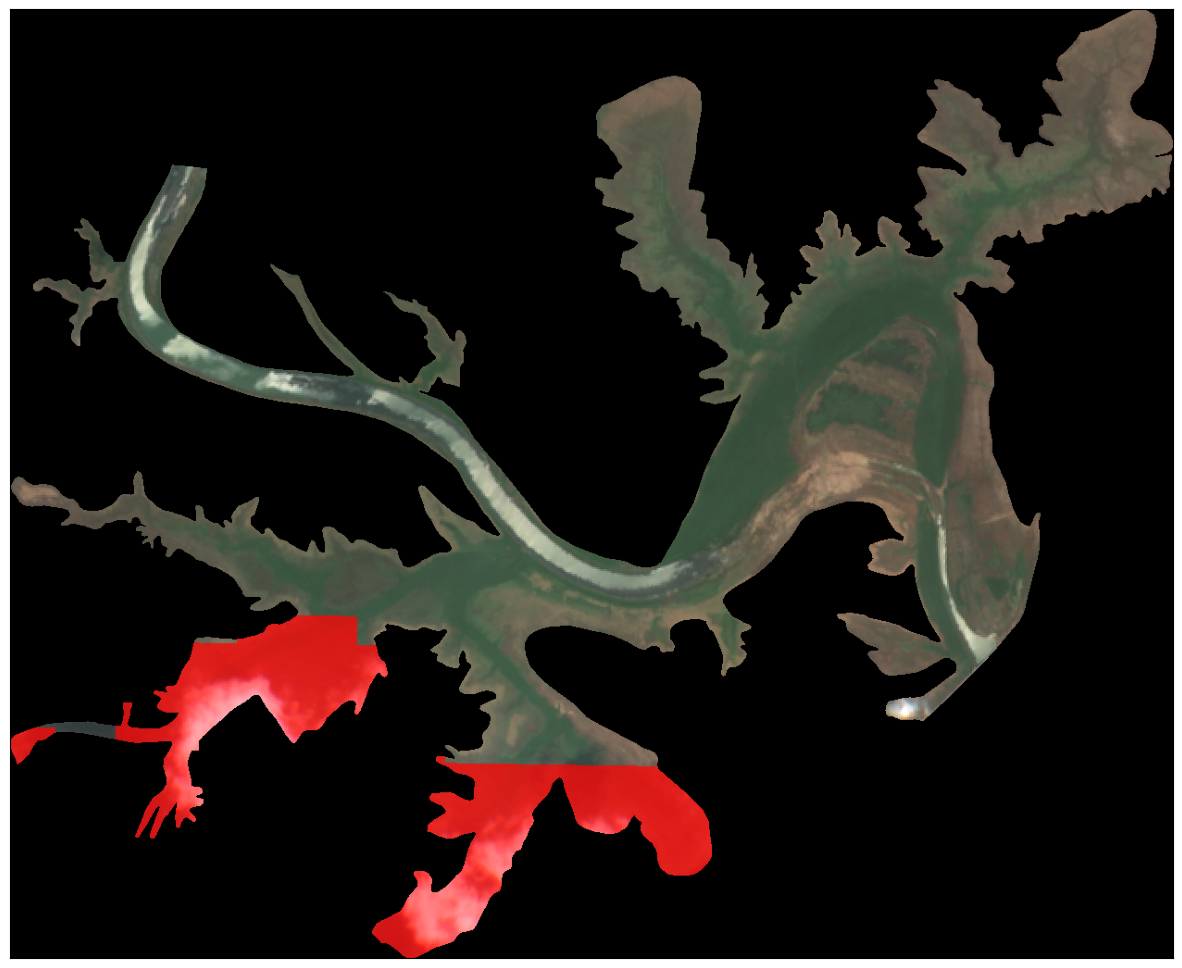

In [38]:
config = utils.get_config()

# first10['osmid'].apply(lambda x: utils.get_image_from_lake(x, 'chl', datetime(2020, 5, 9), config))

utils.get_image_from_lake(1929498, 'cloud', datetime(2020, 5, 31), config);

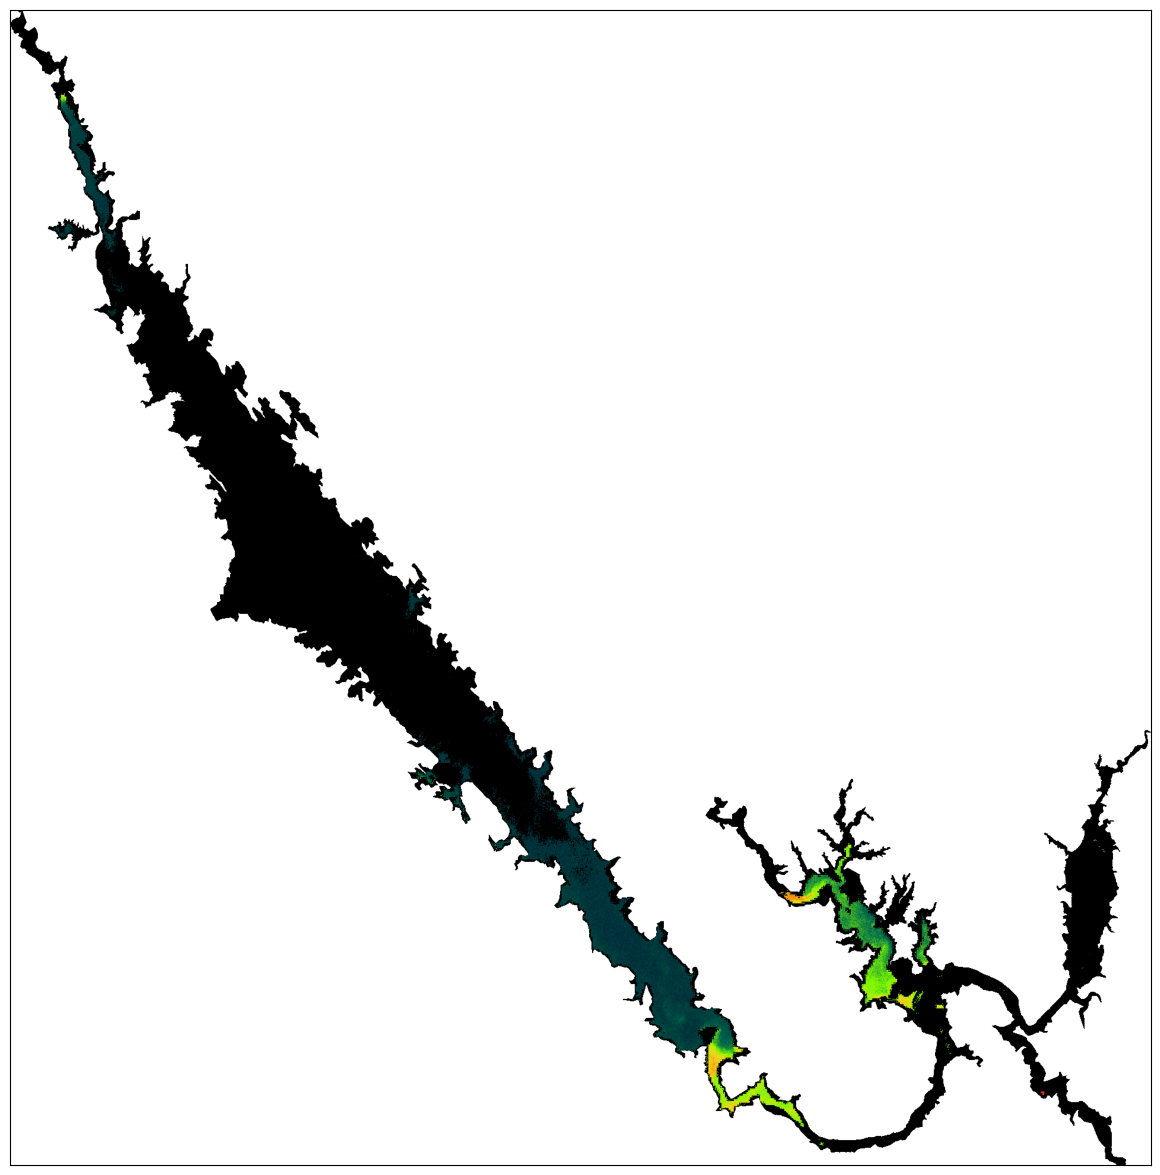

In [22]:
utils.plot_image(image, factor=1/255, clip_range=(0, 1))

In [9]:
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)

evalscripts = os.path.join(parent_directory, 'evalscripts')
evalscript_water_path = os.path.join(evalscripts, 'chlorophyll.js')
with open(evalscript_water_path, 'r') as file:
    evalscript_water = file.read()

In [11]:

osmid  = 1601368
parent_directory = os.path.dirname(current_directory)
aois_path = os.path.join(parent_directory, 'aoi')

aoi_path = os.path.join(aois_path, f"{osmid}.geojson")


# Load the AOI
with open(aoi_path, 'r') as file:
    aoi = json.load(file)
    
# Create a geometry object
geometry = Geometry(aoi, crs=sentinelCRS.WGS84)

In [13]:
minx, miny, maxx, maxy = geometry.total_bounds
bbox = BBox(bbox=[minx, miny, maxx, maxy], crs="EPSG:4326")
resolution = 5
lake_bbox = BBox(bbox=[minx, miny, maxx, maxy], crs=sentinelCRS.WGS84)
lake_size = bbox_to_dimensions(lake_bbox, resolution=resolution)
lake_size

AttributeError: 'Geometry' object has no attribute 'total_bounds'

In [124]:
date = datetime(2020, 6, 13)
date_string = date.strftime("%Y-%m-%d")
request_color = SentinelHubRequest(
        evalscript=evalscript_water,
        input_data=[
            SentinelHubRequest.input_data(
                data_collection=DataCollection.SENTINEL2_L2A,
                time_interval=(date_string, date_string),
            )
        ],
        responses=[SentinelHubRequest.output_response("default", MimeType.PNG)],
        bbox=bbox,
        geometry=geometry,
        size=lake_size,
        config=config,
    )

raw_image = request_color.get_data()
image = raw_image[0]

In [130]:
image.shape

(1947, 1923, 4)

In [131]:
mask = np.any(image != [0, 0, 0, 0], axis=-1)
count = np.sum(mask)
count

335597

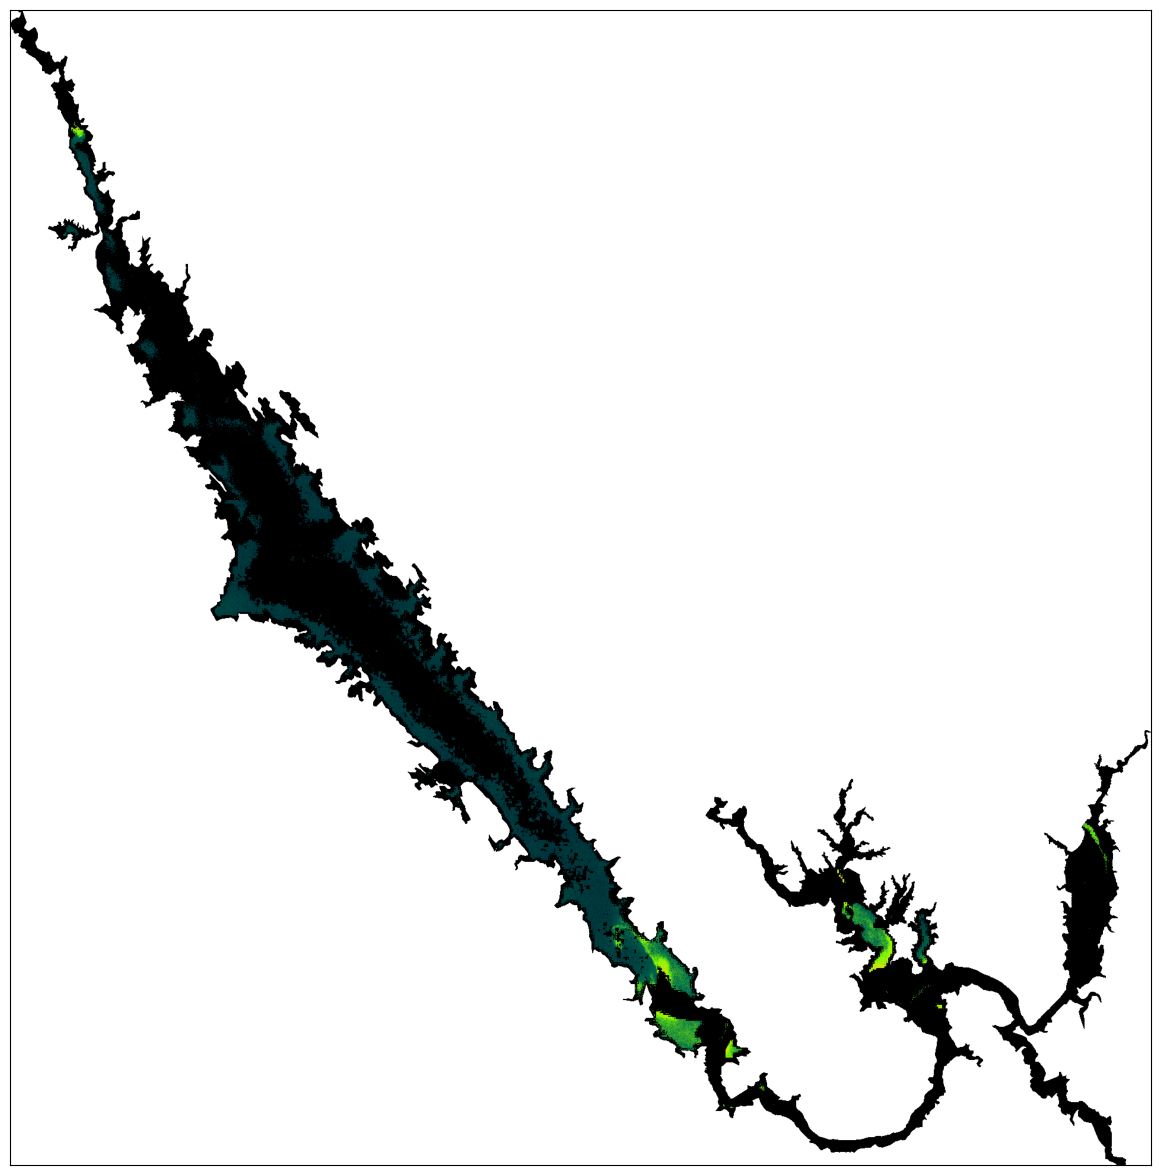

In [125]:
utils.plot_image(image, factor = 1/255, clip_range=(0,1))

In [94]:
config = utils.get_config()
image = utils.get_image_from_lake(1601368, 't', datetime(2020, 6, 13), config)

DownloadFailedException: Failed to download from:
https://services.sentinel-hub.com/api/v1/process
with HTTPError:
400 Client Error: Bad Request for url: https://services.sentinel-hub.com/api/v1/process
Server response: "{"status": 400, "reason": "Bad Request", "message": "Invalid request", "code": "COMMON_BAD_PAYLOAD", "errors": [{"parameter": "output->width", "invalidValue": 7693, "violation": "must be less than or equal to 2500", "description": "The request image width. Must be an integer between 1 and 2500. <br />*Only one pair of parameters \"width\"/\"height\" or \"resx\"/\"resy\" must be set at the same time.*"}, {"parameter": "output->height", "invalidValue": 7789, "violation": "must be less than or equal to 2500", "description": "The request image height. Must be an integer between 1 and 2500. <br />*Only one pair of parameters \"width\"/\"height\" or \"resx\"/\"resy\" must be set at the same time.*"}]}"